<div class="alert alert-block alert-success">
<h1>Comparison to IceSat-2 Freeboards: zero-ice-freeboard assumption</h1></div>

**Student:** Kirsten Schulze <br>
**Email:** <kirsten.schulze@studium.uni-hamburg.de> <br>

**MSc Thesis in Ocean and Climate Physics** <br>
**Title:** Evaluation of Snow Depth Retrievals from Differences in ICESat-2 and CryoSat-2 Freeboards Using In-Situ Measurements in the Weddell Sea  <br>
**Supervisors:** Prof. Dr. Stefanie Arndt and Dr. Stefan Kern <br>
**Hamburg University** <br>


<div class="alert alert-info" role="alert">

## <a id="TOC_TOP"></a>Contents

</div>

1. [Snow Buoys and Satellite Product (Matches for 2019, 2021, 2022)](#section1)
1. [ICESat-2 Freeboards](#section2)
    1. [Load X, Y, Lon and Lat File](#section2.1)
    1. [Year 2019](#section2.2)  
    1. [Year 2021](#section2.3)
    1. [Year 2022](#section2.4)
1. [Match ICESat-2 Freeboards to 29 Matches](#section3)
    1. [Function for the Extraction of X and Y Where In-situ Data is Available](#section3.1)
    1. [Extract ICESat-2 Freeboards for 2019](#section3.2)
    1. [Extract ICESat-2 Freeboards for 2021](#section3.3)
    1. [Extract ICESat-2 Freeboards for 2022](#section3.4)
1. [Compare ICESat-2 Freeboards with Snow Buoys](#section4)
<hr>

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

In [2]:
plt.style.use("ggplot")

<div class="alert alert-info" role="alert">

## <a id="section1"></a>Snow Buoys and Satellite Product (Matches for 2019, 2021, 2022)
[Back to top](#TOC_TOP)

</div>

In [3]:
file = "matches_2019.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
matches_2019 = ds
matches_2019

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05


In [4]:
file = "matches_2021.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
matches_2021 = ds
matches_2021

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01
1,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02
2,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06
3,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07
4,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15
5,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902,-74.58146,-36.52886,2021-04-26
6,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548,-74.37370,-40.23636,2021-05-29
7,2021,6,7,-1050.0,1425.0,10.48421,71.395,114.635,-1048.022189,1433.452009,S55,-73.7144,-36.1712,-73.76549,-36.38435,2021-06-07
8,2021,6,11,-1050.0,1425.0,10.05532,71.263,114.504,-1050.751403,1436.711215,S55,-73.6760,-36.1802,-73.76549,-36.38435,2021-06-11
9,2021,6,14,-1150.0,1325.0,12.01153,58.107,62.178,-1160.420045,1334.759992,S114,-73.7782,-41.0032,-73.90681,-40.95551,2021-06-14


In [5]:
file = "matches_2022.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
matches_2022 = ds
matches_2022

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2022,5,9,-2125.0,1550.0,31.55190,57.006,85.185,-2123.504008,1554.591203,S114,-66.0472,-53.7926,-66.06048,-53.89255,2022-05-09
1,2022,6,20,-2175.0,1775.0,19.63112,59.768,91.871,-2180.356674,1769.856225,S114,-64.4896,-50.9328,-64.49758,-50.78239,2022-06-20
2,2022,7,5,-2250.0,1900.0,17.19627,60.195,96.172,-2247.362213,1890.725799,S114,-63.3602,-49.9258,-63.29019,-49.82077,2022-07-05
3,2022,7,11,-2250.0,1925.0,26.62206,62.056,98.317,-2256.327665,1923.370288,S114,-63.1156,-49.5546,-63.14845,-49.45117,2022-07-11
4,2022,8,12,-2150.0,2150.0,7.42236,66.924,120.022,-2149.748670,2144.127995,S114,-62.4918,-45.0750,-62.45403,-45.00000,2022-08-12
5,2022,8,17,-2175.0,2150.0,10.31647,68.672,124.806,-2174.007433,2146.528541,S114,-62.3268,-45.3644,-62.29936,-45.33119,2022-08-17


<div class="alert alert-info" role="alert">

## <a id="section2"></a>ICESat-2 Freeboards
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section2.1"></a>Load X, Y, Lon and Lat File
[Back to top](#TOC_TOP)

</div>

In [6]:
#load grid of Satellite Product 
df = pd.read_csv("KacimiandKwok_ANT_SnowThickness/lat_lon_file.txt", delimiter="\s+", names = ["X", "Y", "lat", "lon"])
df

,X,Y,lat,lon
0,-3500.0,-3500.0,-46.44925,-135.00000
1,-3475.0,-3500.0,-46.59050,-135.20536
2,-3450.0,-3500.0,-46.73138,-135.41219
3,-3425.0,-3500.0,-46.87187,-135.62051
4,-3400.0,-3500.0,-47.01197,-135.83032
...,...,...,...,...
83995,3375.0,3975.0,-44.34611,40.33314
83996,3400.0,3975.0,-44.21832,40.54189
83997,3425.0,3975.0,-44.09009,40.74935
83998,3450.0,3975.0,-43.96145,40.95551


<div class="alert alert-danger" role="alert">

### <a id="section2.2"></a>Year 2019
[Back to top](#TOC_TOP)

</div>

In [7]:
# List of months and their corresponding number of days
months_days = {
    "04": 30,  # April
    "05": 31,  # May
    "06": 30,  # June
    "07": 31,  # July
    "08": 31,  # August
    "09": 30,  # September
    "10": 31,  # October
    "11": 30   # November
}

base_dir = "Daily_sd_is2/For_Kirsten/"

# Dictionary to store DataFrames for each month
dfs_by_month_2019 = {}

# Loop through each month
for month, days in months_days.items():
    dfs_month = []
    for day in range(1, days + 1):
        # Construct file path and column name
        file_path = f"{base_dir}Daily_sd_is2_Kirsten_19{month}{day:02d}.txt"
        column_name = f"2019-{month}-{day:02d}"
        
        try:
            df_daily = pd.read_csv(file_path, delimiter="\s+", names=[column_name])
            dfs_month.append(df_daily)
        except FileNotFoundError:
            print(f"File not found: {file_path}. Skipping to the next file.")
            continue
    
    # Concatenate all DataFrames for the current month
    if dfs_month:
        df_snow_month = pd.concat(dfs_month, axis=1)
        
        # Assume df is defined elsewhere in your code
        df_snow_lon_lat_month = pd.concat([df, df_snow_month], axis=1)

        # Filter out the Weddell Region
        df_Weddell = df_snow_lon_lat_month[df_snow_lon_lat_month["lon"] < 15]
        #print(df_snow_lon_lat_month)
        df_snow_lon_lat_month = df_Weddell[df_Weddell["lon"] > -62]

        # Reset index
        df_snow_lon_lat_month.reset_index(drop=True, inplace=True)

        # Store in the dictionary
        dfs_by_month_2019[month] = df_snow_lon_lat_month

<div class="alert alert-danger" role="alert">

### <a id="section2.3"></a>Year 2021
[Back to top](#TOC_TOP)

</div>

In [8]:
# List of months and their corresponding number of days
months_days = {
    "04": 30,  # April
    "05": 31,  # May
    "06": 30,  # June
    "07": 31,  # July
    "08": 31,  # August
    "09": 30,  # September
    "10": 31,  # October
    "11": 30   # November
}

base_dir = "Daily_sd_is2/For_Kirsten/"

# Dictionary to store DataFrames for each month
dfs_by_month_2021 = {}

# Loop through each month
for month, days in months_days.items():
    dfs_month = []
    for day in range(1, days + 1):
        # Construct file path and column name
        file_path = f"{base_dir}Daily_sd_is2_Kirsten_21{month}{day:02d}.txt"
        column_name = f"2021-{month}-{day:02d}"
        
        try:
            df_daily = pd.read_csv(file_path, delimiter="\s+", names=[column_name])
            dfs_month.append(df_daily)
        except FileNotFoundError:
            print(f"File not found: {file_path}. Skipping to the next file.")
            continue
    
    # Concatenate all DataFrames for the current month
    if dfs_month:
        df_snow_month = pd.concat(dfs_month, axis=1)
        
        # Assume df is defined elsewhere in your code
        df_snow_lon_lat_month = pd.concat([df, df_snow_month], axis=1)

        # Filter out the Weddell Region
        df_Weddell = df_snow_lon_lat_month[df_snow_lon_lat_month["lon"] < 15]
        df_snow_lon_lat_month = df_Weddell[df_Weddell["lon"] > -62]

        # Reset index
        df_snow_lon_lat_month.reset_index(drop=True, inplace=True)

        # Store in the dictionary
        dfs_by_month_2021[month] = df_snow_lon_lat_month


<div class="alert alert-danger" role="alert">

### <a id="section2.4"></a>Year 2022
[Back to top](#TOC_TOP)

</div>

In [9]:
# List of months and their corresponding number of days
months_days = {
    "04": 30,  # April
    "05": 31,  # May
    "06": 30,  # June
    "07": 31,  # July
    "08": 31,  # August
    "09": 30,  # September
    "10": 31,  # October
}

base_dir = "Daily_sd_is2/For_Kirsten/"

# Dictionary to store DataFrames for each month
dfs_by_month_2022 = {}

# Loop through each month
for month, days in months_days.items():
    dfs_month = []
    for day in range(1, days + 1):
        # Construct file path and column name
        file_path = f"{base_dir}Daily_sd_is2_Kirsten_22{month}{day:02d}.txt"
        column_name = f"2022-{month}-{day:02d}"
        
        try:
            df_daily = pd.read_csv(file_path, delimiter="\s+", names=[column_name])
            dfs_month.append(df_daily)
        except FileNotFoundError:
            print(f"File not found: {file_path}. Skipping to the next file.")
            continue
    
    # Concatenate all DataFrames for the current month
    if dfs_month:
        df_snow_month = pd.concat(dfs_month, axis=1)
        
        # Assume df is defined elsewhere in your code
        df_snow_lon_lat_month = pd.concat([df, df_snow_month], axis=1)

        # Filter out the Weddell Region
        df_Weddell = df_snow_lon_lat_month[df_snow_lon_lat_month["lon"] < 15]
        df_snow_lon_lat_month = df_Weddell[df_Weddell["lon"] > -62]

        # Reset index
        df_snow_lon_lat_month.reset_index(drop=True, inplace=True)

        # Replace -999.0 with NaN
        #df_snow_lon_lat_month.replace(-999.0, np.nan, inplace=True)

        # Store in the dictionary
        dfs_by_month_2022[month] = df_snow_lon_lat_month


<div class="alert alert-info" role="alert">

## <a id="section3"></a> Match ICESat-2 Freeboards to 29 Matches
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

## <a id="section3.1"></a> Function for the Extraction of X and Y Where In-situ Data is Available 
[Back to top](#TOC_TOP)

</div>

In [10]:
def extract_X_and_Y_where_insitu_data(dataframe):
    
    # Extract the latitude, longitude, and limiting magnitude data from the DataFrame
    lats = dataframe["Y"].values  #here we do not need to devided by 1000!
    lons = dataframe["X"].values

    # Create a custom grid    
    lon_bins = np.linspace(-3512.5, 1062.5, 184)
    lat_bins = np.linspace(-12.5, 3987.5, 161)

    # Create 2D histogram to get density values
    density, _, _ = np.histogram2d(lats, lons, bins=[lat_bins, lon_bins])
    
    # Exclude zero values
    nonzero_density = density[density != 0]
    
    lenght = len(nonzero_density)
    
    x_values = np.arange(0, lenght, 1)
    
    #Create a boolean mask for density values >= 1
    density_mask = density >= 1

    # Get the x and y coordinates of the grid cells that meet the condition
    x_values = np.where(density_mask)[1]
    y_values = np.where(density_mask)[0]


    # Create a list of tuples containing the x and y coordinates
    #the return give us the number of the postion of the lon and lat grid which is not empty
    grid_cells = list(zip(x_values, y_values))
    
    grid_cells_x_y =[]

    lon_bins = np.linspace(-3512.5, 1062.5, 184)
    lat_bins = np.linspace(-12.5, 3987.5, 161)

    for i, j in grid_cells: 
        a = lon_bins[i]+12.5
        b = lat_bins[j]+12.5
        grid_cells_x_y.append((a, b))

    return grid_cells_x_y

<div class="alert alert-danger" role="alert">

### <a id="section3.2"></a>Extract ICESat-2 Freeboards for 2019
[Back to top](#TOC_TOP)

</div>

In [11]:
results_df = matches_2019.copy()
results_df["ICESat-2 Freeboard"] = np.nan  # Initialize the new column with NaN

for month in range(4, 12):
    month_str = f"{month:02d}"
    
    for day in range(1, 31):
        X_Y_Values_for_month_day = extract_X_and_Y_where_insitu_data(
            matches_2019[(matches_2019["Month"] == int(month)) & (matches_2019["Day"] == day)]
        )
        
        day_sat = f"2019-{month_str}-{day:02d}"

        # Check if the DataFrame for the month exists and the column exists in that DataFrame
        if month_str in dfs_by_month_2019 and day_sat in dfs_by_month_2019[month_str].columns:
            for i, j in X_Y_Values_for_month_day:
                snow_depth_value_ICESat = dfs_by_month_2019[month_str].loc[
                    (dfs_by_month_2019[month_str]["X"] == i) & 
                    (dfs_by_month_2019[month_str]["Y"] == j), 
                    day_sat
                ].values
                
                # Only append non-NaN values
                if not np.isnan(snow_depth_value_ICESat).all():
                    snow_depth_value_ICESat = np.ravel(snow_depth_value_ICESat)
                    for value in snow_depth_value_ICESat:
                        if not np.isnan(value):
                            # Assign the value to the new column in the corresponding row 
                            results_df.loc[
                                (results_df["Month"] == month) & 
                                (results_df["Day"] == day) & 
                                (results_df["X"] == i) & 
                                (results_df["Y"] == j),
                                "ICESat-2 Freeboard"
                            ] = value

matches_2019_ICESat = results_df
matches_2019_ICESat

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,ICESat-2 Freeboard
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06,23.64559
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22,41.09205
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23,44.22382
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09,34.98375
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05,45.62688


<div class="alert alert-danger" role="alert">

### <a id="section3.3"></a>Extract ICESat-2 Freeboards for 2021
[Back to top](#TOC_TOP)

</div>

In [12]:
results_df = matches_2021.copy()
results_df["ICESat-2 Freeboard"] = np.nan  

for month in range(4, 12):
    month_str = f"{month:02d}"
    
    for day in range(1, 31):
        X_Y_Values_for_month_day = extract_X_and_Y_where_insitu_data(
            matches_2021[(matches_2021["Month"] == int(month)) & (matches_2021["Day"] == day)]
        )
        
        day_sat = f"2021-{month_str}-{day:02d}"

        # Check if the DataFrame for the month exists and the column exists in that DataFrame
        if month_str in dfs_by_month_2021 and day_sat in dfs_by_month_2021[month_str].columns:
            for i, j in X_Y_Values_for_month_day:
                snow_depth_value_ICESat = dfs_by_month_2021[month_str].loc[
                    (dfs_by_month_2021[month_str]["X"] == i) & 
                    (dfs_by_month_2021[month_str]["Y"] == j), 
                    day_sat
                ].values
                
                # Only append non-NaN values
                if not np.isnan(snow_depth_value_ICESat).all():
                    snow_depth_value_ICESat = np.ravel(snow_depth_value_ICESat)
                    for value in snow_depth_value_ICESat:
                        if not np.isnan(value):
                            # Assign the value to the new column in the corresponding row 
                            results_df.loc[
                                (results_df["Month"] == month) & 
                                (results_df["Day"] == day) & 
                                (results_df["X"] == i) & 
                                (results_df["Y"] == j),
                                "ICESat-2 Freeboard"
                            ] = value
        

matches_2021_ICESat = results_df
matches_2021_ICESat

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,ICESat-2 Freeboard
0,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,10.40937
1,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02,10.51206
2,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,14.26550
3,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07,33.10854
4,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15,12.02935
5,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902,-74.58146,-36.52886,2021-04-26,18.84575
6,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548,-74.37370,-40.23636,2021-05-29,26.31966
7,2021,6,7,-1050.0,1425.0,10.48421,71.395,114.635,-1048.022189,1433.452009,S55,-73.7144,-36.1712,-73.76549,-36.38435,2021-06-07,26.93600
8,2021,6,11,-1050.0,1425.0,10.05532,71.263,114.504,-1050.751403,1436.711215,S55,-73.6760,-36.1802,-73.76549,-36.38435,2021-06-11,23.69604
9,2021,6,14,-1150.0,1325.0,12.01153,58.107,62.178,-1160.420045,1334.759992,S114,-73.7782,-41.0032,-73.90681,-40.95551,2021-06-14,23.79749


<div class="alert alert-danger" role="alert">

### <a id="section3.4"></a>Extract ICESat-2 Freeboards for 2022
[Back to top](#TOC_TOP)

</div>

In [13]:
results_df = matches_2022.copy()
results_df["ICESat-2 Freeboard"] = np.nan  

for month in range(4, 12):
    month_str = f"{month:02d}"
    
    for day in range(1, 31):
        X_Y_Values_for_month_day = extract_X_and_Y_where_insitu_data(
            matches_2022[(matches_2022["Month"] == int(month)) & (matches_2022["Day"] == day)]
        )
        
        day_sat = f"2022-{month_str}-{day:02d}"

        # Check if the DataFrame for the month exists and the column exists in that DataFrame
        if month_str in dfs_by_month_2022 and day_sat in dfs_by_month_2022[month_str].columns:
            for i, j in X_Y_Values_for_month_day:
                snow_depth_value_ICESat = dfs_by_month_2022[month_str].loc[
                    (dfs_by_month_2022[month_str]["X"] == i) & 
                    (dfs_by_month_2022[month_str]["Y"] == j), 
                    day_sat
                ].values
                
                # Only append non-NaN values
                if not np.isnan(snow_depth_value_ICESat).all():
                    snow_depth_value_ICESat = np.ravel(snow_depth_value_ICESat)
                    for value in snow_depth_value_ICESat:
                        if not np.isnan(value):
                            # Assign the value to the new column in the corresponding row 
                            results_df.loc[
                                (results_df["Month"] == month) & 
                                (results_df["Day"] == day) & 
                                (results_df["X"] == i) & 
                                (results_df["Y"] == j),
                                "ICESat-2 Freeboard"
                            ] = value
        
matches_2022_ICESat = results_df
matches_2022_ICESat

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,ICESat-2 Freeboard
0,2022,5,9,-2125.0,1550.0,31.55190,57.006,85.185,-2123.504008,1554.591203,S114,-66.0472,-53.7926,-66.06048,-53.89255,2022-05-09,50.28843
1,2022,6,20,-2175.0,1775.0,19.63112,59.768,91.871,-2180.356674,1769.856225,S114,-64.4896,-50.9328,-64.49758,-50.78239,2022-06-20,34.51533
2,2022,7,5,-2250.0,1900.0,17.19627,60.195,96.172,-2247.362213,1890.725799,S114,-63.3602,-49.9258,-63.29019,-49.82077,2022-07-05,38.79150
3,2022,7,11,-2250.0,1925.0,26.62206,62.056,98.317,-2256.327665,1923.370288,S114,-63.1156,-49.5546,-63.14845,-49.45117,2022-07-11,49.27310
4,2022,8,12,-2150.0,2150.0,7.42236,66.924,120.022,-2149.748670,2144.127995,S114,-62.4918,-45.0750,-62.45403,-45.00000,2022-08-12,32.51206
5,2022,8,17,-2175.0,2150.0,10.31647,68.672,124.806,-2174.007433,2146.528541,S114,-62.3268,-45.3644,-62.29936,-45.33119,2022-08-17,39.32481


<div class="alert alert-info" role="alert">

## <a id="section4"></a> Compare ICESat-2 Freeboards with Snow Buoys
[Back to top](#TOC_TOP)

</div>

In [14]:
matches_all = pd.concat([matches_2019_ICESat, matches_2021_ICESat, matches_2022_ICESat], axis=0)
matches_all = matches_all.reset_index(drop=True)
matches_all

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,ICESat-2 Freeboard
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06,23.64559
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22,41.09205
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23,44.22382
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09,34.98375
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05,45.62688
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,10.40937
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02,10.51206
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,14.26550
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07,33.10854
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15,12.02935


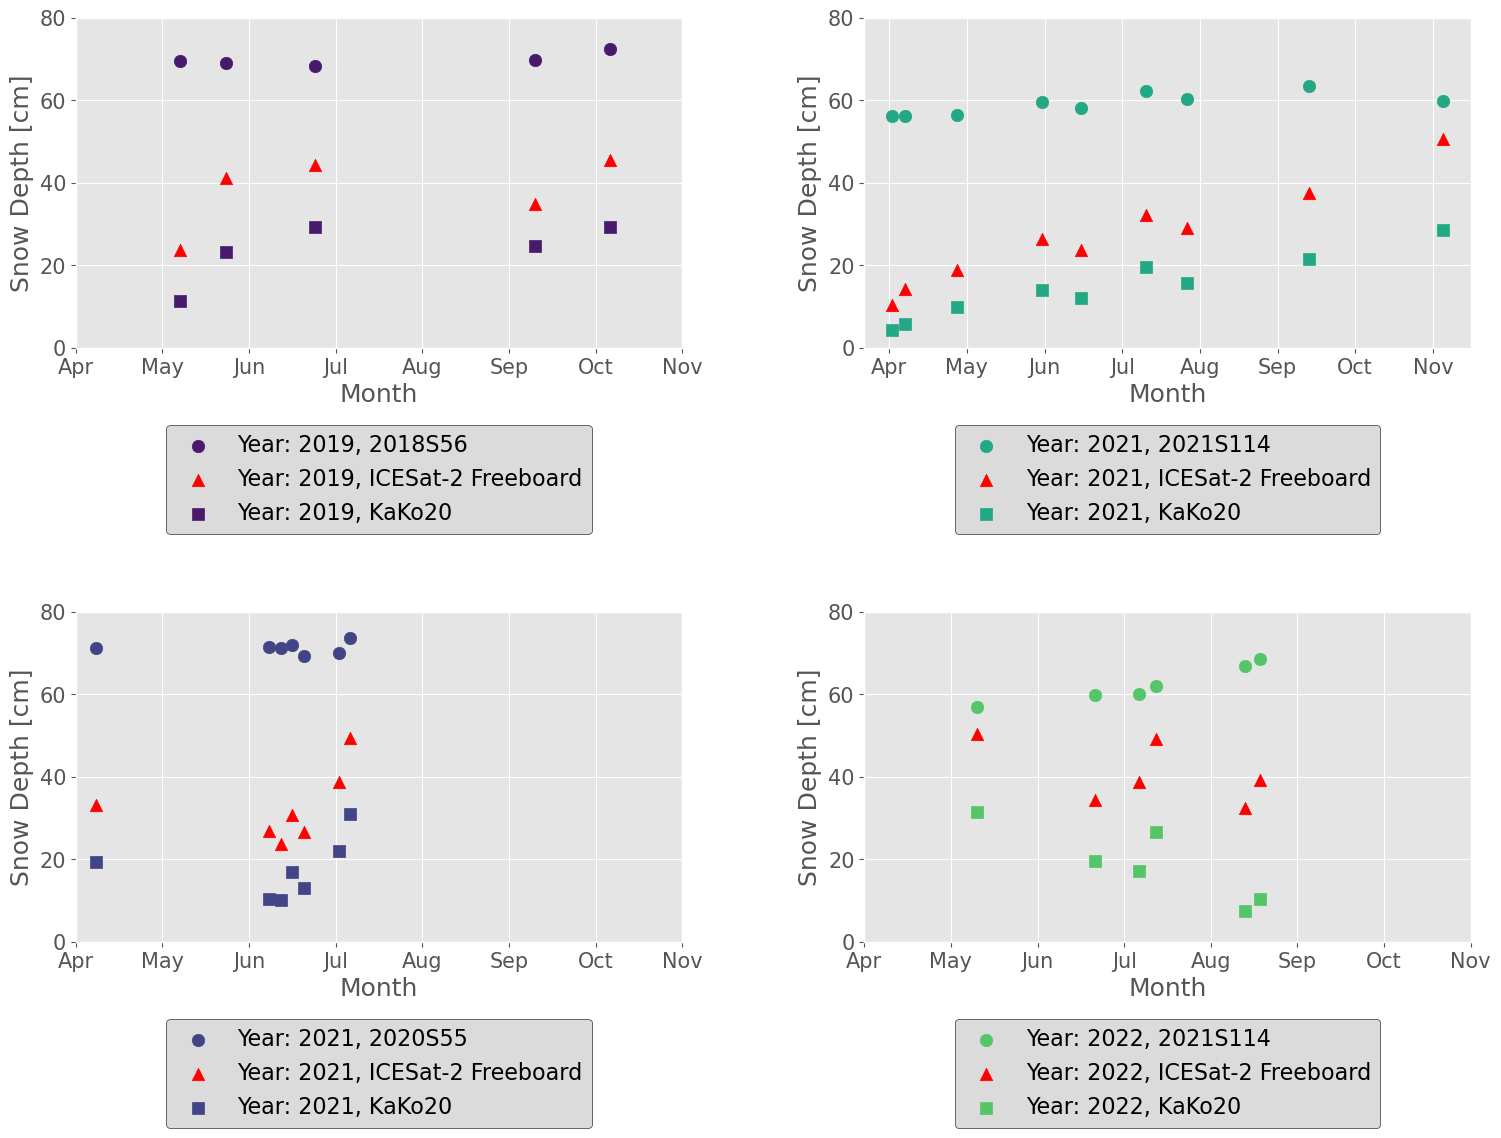

In [15]:
# Set the y-axis limits
y_limits = (0, 80)

# Define the custom color palette
custom_palette = sns.color_palette("viridis", 14)

# Define the mapping for old sensor numbers to new format
sensor_number_mapping = {
    "S119": "2022S119",
    "S56": "2018S56",
    "S55": "2020S55",
    "S114": "2021S114",
    "S112": "2021S112"
}

# Update the Sensor_Number column in matches_all DataFrame
matches_all["Sensor_Number"] = matches_all["Sensor_Number"].map(sensor_number_mapping).fillna(matches_all["Sensor_Number"])

# Create a mapping from sensor number to specific colors from the custom palette
sensor_color_map = {
    "2022S119": custom_palette[13],
    "2018S56": custom_palette[0],
    "2020S55": custom_palette[2],
    "2021S114": custom_palette[8],
    "2021S112": custom_palette[5]
}

# Update the specific condition for "2021S114" in year 2022
special_condition_color = custom_palette[10]

# Create a new column "Month_Day" that combines month and day into a fractional month representation
matches_all["Month_Day"] = matches_all["Month"] + matches_all["Day"] / 30.0

# Create a new column combining "Sensor_Number" and "Year" for unique color assignment
matches_all["Sensor_Year"] = matches_all["Sensor_Number"].astype(str) + "_" + matches_all["Year"].astype(str)

fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={"hspace": 0.8, "wspace": 0.3})  
# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Define the 4 sensor-year combinations you want to plot
sensor_years_to_plot = ["2018S56_2019", "2021S114_2021", "2020S55_2021", "2021S114_2022"]

# Loop through each subplot and plot a different sensor-year combination
for i, ax in enumerate(axes[:4]):  # Plot only 4 subplots
    sensor_year = sensor_years_to_plot[i]
    sensor_year_data = matches_all[matches_all["Sensor_Year"] == sensor_year]
    
    # Extract the year and sensor information
    year = sensor_year.split("_")[1]
    sensor = sensor_year.split("_")[0]
    
    if sensor == "2021S114" and year == "2022":
        color = special_condition_color
    else:
        color = sensor_color_map.get(sensor, "black")  
    

    ax.scatter(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_buoy"], marker="o", s=80, 
         label=f"Year: {year}, {sensor}", color=color)
    
    ax.scatter(sensor_year_data["Month_Day"], sensor_year_data["ICESat-2 Freeboard"], marker="^", s=80, 
             label=f"Year: {year}, ICESat-2 Freeboard", color="red")

    ax.scatter(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_satellite"], marker="s", s=80, 
             label=f"Year: {year}, KaKo20", color=color)
    
    
    ax.set_xticks([4 + i for i in range(8)])
    ax.set_xticklabels(["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])
    ax.set_ylim(y_limits)
    
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), fontsize=16, ncol=1, frameon=True, facecolor="lightgrey", 
              edgecolor="black")
    ax.set_xlabel("Month", fontsize=18)
    ax.set_ylabel("Snow Depth [cm]", fontsize=18)


plt.savefig("ICESat2Freeboards.png", bbox_inches="tight")
plt.show()


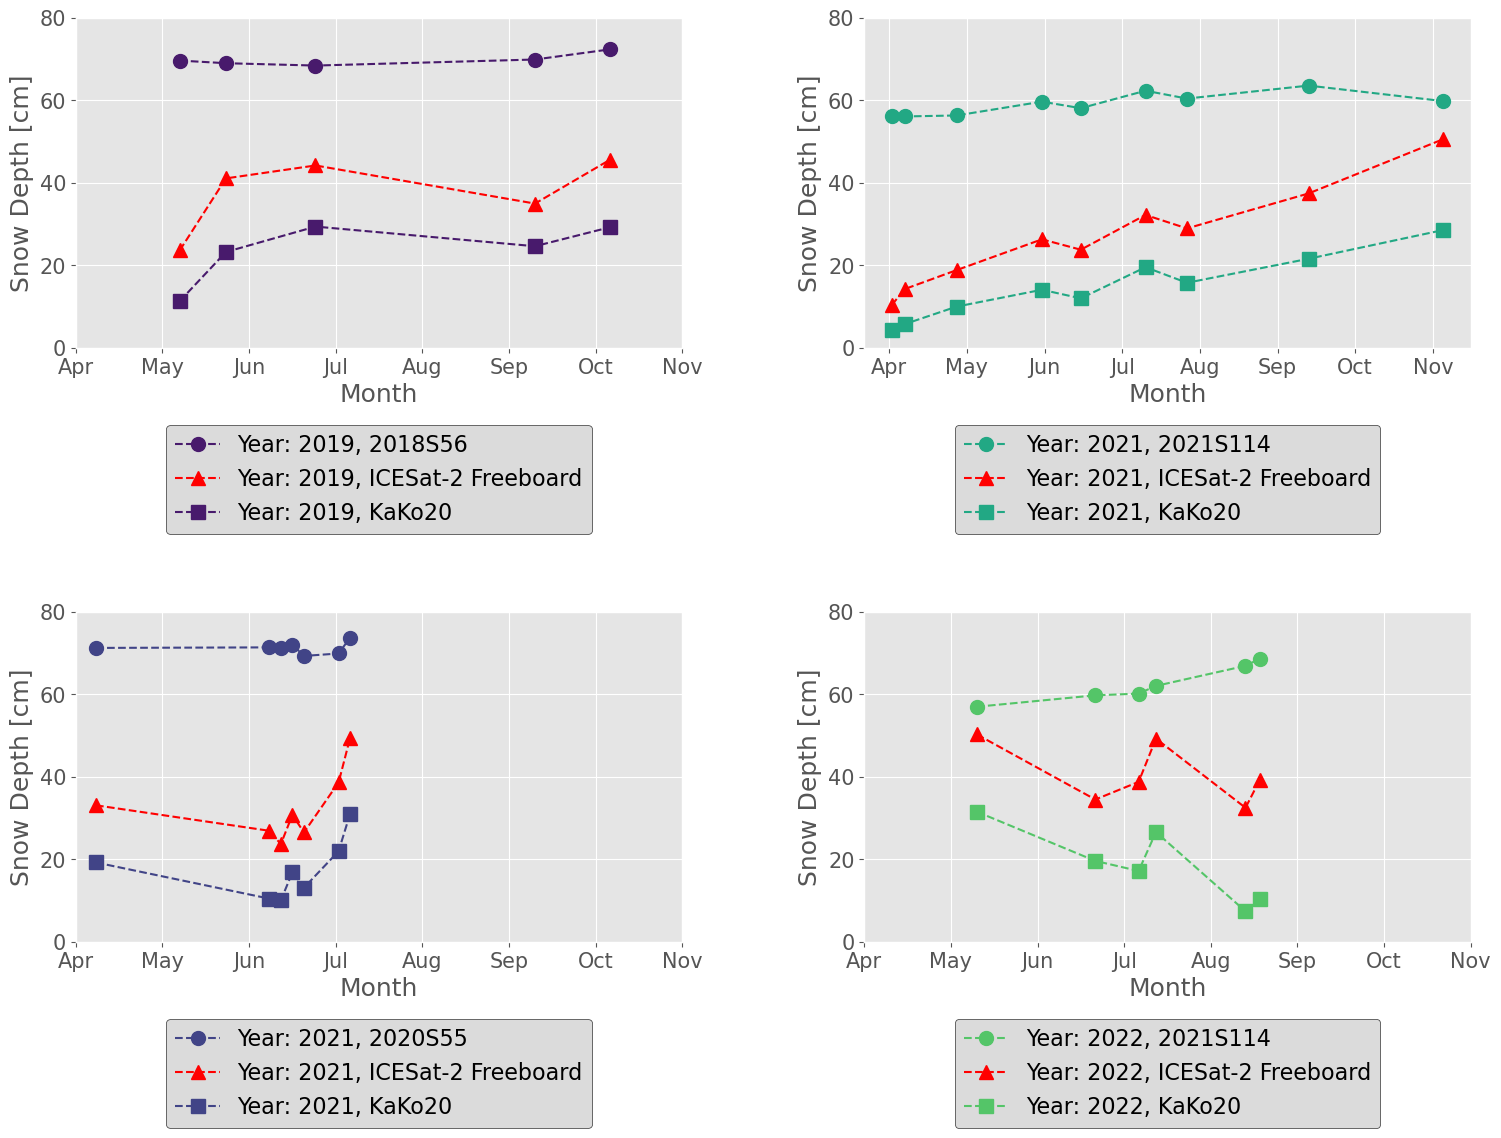

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={"hspace": 0.8, "wspace": 0.3})  

axes = axes.flatten()

# Define the 4 sensor-year combinations you want to plot
sensor_years_to_plot = ["2018S56_2019", "2021S114_2021", "2020S55_2021", "2021S114_2022"]

# Loop through each subplot and plot a different sensor-year combination
for i, ax in enumerate(axes[:4]):  # Plot only 4 subplots
    sensor_year = sensor_years_to_plot[i]
    sensor_year_data = matches_all[matches_all["Sensor_Year"] == sensor_year]
    
    # Extract the year and sensor information
    year = sensor_year.split("_")[1]
    sensor = sensor_year.split("_")[0]
    
    if sensor == "2021S114" and year == "2022":
        color = special_condition_color
    else:
        color = sensor_color_map.get(sensor, "black")  
    

    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_buoy"], marker="o",  
             markersize=10, linestyle="--", label=f"Year: {year}, {sensor}", color=color)
    
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["ICESat-2 Freeboard"], marker="^", 
             markersize=10, linestyle="--", label=f"Year: {year}, ICESat-2 Freeboard", color="red")

    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_satellite"], marker="s", 
             markersize=10, linestyle="--", label=f"Year: {year}, KaKo20", color=color)
    
    ax.set_xticks([4 + i for i in range(8)])
    ax.set_xticklabels(["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])
    ax.set_ylim(y_limits)
    
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), fontsize=16, ncol=1, frameon=True, facecolor="lightgrey", 
              edgecolor="black")
    ax.set_xlabel("Month", fontsize=18)
    ax.set_ylabel("Snow Depth [cm]", fontsize=18)


plt.savefig("ICESat2Freeboards_line.png", bbox_inches="tight")
plt.show()